In [5]:
#Data Collection
#K-Nearest Neighbors Model
#Predicting the type of BIP (Classification) using the 2022 baseball season

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pybaseball import statcast
stat_df = statcast(start_dt="2022-04-07", end_dt="2022-10-02")

This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████| 179/179 [00:39<00:00,  4.48it/s]
C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [36]:
#Full data set
stat_df

# To see coluns in data set
#for col in stat_df.columns:
   # print(col)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2687,FF,2022-10-02,93.5,1.7,5.95,"Zastryzny, Rob",663993,642239,strikeout,foul_tip,...,8,3,8,3,8,Standard,Standard,167,0.0,-0.083
2862,CU,2022-10-02,80.9,2.06,5.59,"Zastryzny, Rob",663993,642239,None,ball,...,8,3,8,3,8,Standard,Standard,273,0.0,0.014
2912,FF,2022-10-02,92.3,1.65,5.93,"Zastryzny, Rob",663993,642239,None,foul,...,8,3,8,3,8,Standard,Standard,157,0.0,0.0
3107,FF,2022-10-02,94.3,1.65,5.93,"Zastryzny, Rob",663993,642239,None,ball,...,8,3,8,3,8,Standard,Standard,159,0.0,0.011
3188,FF,2022-10-02,93.4,1.81,5.93,"Zastryzny, Rob",663993,642239,None,called_strike,...,8,3,8,3,8,Standard,Standard,156,0.0,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,FS,2022-04-07,91.8,-1.76,6.04,"Ohtani, Shohei",514888,660271,strikeout,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.022,-0.195
1797,ST,2022-04-07,86.9,-2.29,5.77,"Ohtani, Shohei",514888,660271,None,called_strike,...,0,0,0,0,0,Standard,Standard,92,0.0,-0.066
1885,FF,2022-04-07,99.2,-2.13,5.87,"Ohtani, Shohei",514888,660271,None,ball,...,0,0,0,0,0,Standard,Standard,207,0.0,0.049
1955,FF,2022-04-07,97.9,-2.16,5.89,"Ohtani, Shohei",514888,660271,None,called_strike,...,0,0,0,0,0,Standard,Standard,206,0.0,-0.043


In [7]:
#Exit Velocity and Launch Angle
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [8]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

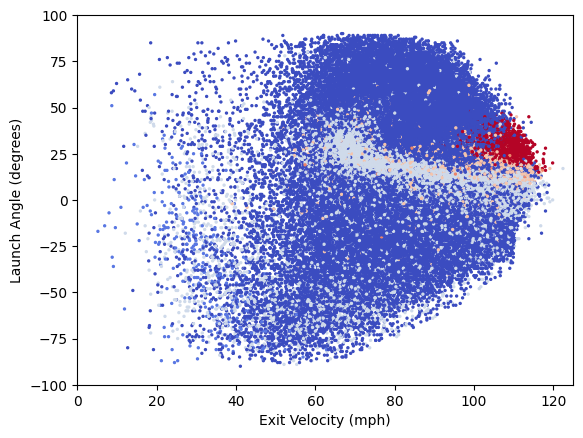

In [9]:
#Plot of the Data with wOBA values on a coolwarm color scale
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(0,125)
ax.set_ylim(-100,100)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()

In [10]:
bip_df.isnull().values.any()

# Identify rows with NaN values
rows_with_nan = bip_df[bip_df.isnull().any(axis=1)]
 
#View the rows with NaN values
print(rows_with_nan)

#New Data table that includes Launch Speed, Launch Angle, and Events
ev_la_df = bip_df[["launch_speed", "launch_angle", "events",]]

     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
3518         CU 2022-10-02           78.4           1.95           5.71   
4170         CH 2022-10-02           78.8           1.86            5.8   
2458         FF 2022-10-02           96.9          -2.12           5.78   
3687         FF 2022-10-02           98.5          -2.23           5.78   
1362         SI 2022-10-02           92.9           1.98           5.41   
...         ...        ...            ...            ...            ...   
1472         SI 2022-04-07           92.9           0.96           5.98   
1979         SI 2022-04-07           94.2           0.84           6.14   
990          FF 2022-04-07           98.0           -2.0           5.95   
1383         FF 2022-04-07           97.7          -1.83           5.94   
1649         FF 2022-04-07           99.0          -2.01            5.9   

          player_name  batter  pitcher                     events  \
3518   Zastryzny, Rob  608369 

In [11]:
#Categorize the events: Out, Single, Double, Triple, and Homerun
ev_la_df = ev_la_df[ev_la_df["events"].isin(["field_out", "single", "double", "triple", "home_run"])]
ev_la_df["events_encoded"] = [0 if x == "field_out" 
                                  else 1 if x == "single" 
                                  else 2 if x == "double" 
                                  else 3 if x == "triple" 
                                  else 4 if x == "home_run" 
                                  else 5 for x in ev_la_df["events"]]


# Split the data into features (X) and target (y)
X = ev_la_df.drop("events_encoded", axis=1)
Y = ev_la_df["events_encoded"]

# Split the data into training and test sets: 75% of the data is for training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import log_loss
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm

#Scale the data
scaler= StandardScaler()
features = ["launch_speed", "launch_angle"]
X_train = scaler.fit_transform(X_train[features])
X_test = scaler.transform(X_test[features])

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Determining the best K value
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(30,300,30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 30,  60,  90, 120, 150, 180, 210, 240, 270])})

In [14]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 210}

In [15]:
#The ideal k value is 210
#Find the accuracy score of the model
knn_gscv.score(X_test, Y_test)

0.7578063847978709

In [16]:
#preds_test is an array with the probabilities of each event for every data point within X_test
preds_test = knn_gscv.predict_proba(X_test)
preds_test

array([[0.61428571, 0.34761905, 0.03809524, 0.        , 0.        ],
       [0.71904762, 0.27142857, 0.00952381, 0.        , 0.        ],
       [0.39047619, 0.        , 0.05714286, 0.00952381, 0.54285714],
       ...,
       [0.08095238, 0.79047619, 0.11428571, 0.01428571, 0.        ],
       [0.81904762, 0.16190476, 0.01904762, 0.        , 0.        ],
       [0.85238095, 0.01428571, 0.12380952, 0.00952381, 0.        ]])

In [17]:
#wOBA weights from MLB
wOBA_weights = np.array([0,0.9,1.25,1.6,2])

#wOBA values are calculated by multiplying preds_test (probablilty matrix) with wOBA_weights
wOBA_values = preds_test*wOBA_weights
wOBA_values



array([[0.        , 0.31285714, 0.04761905, 0.        , 0.        ],
       [0.        , 0.24428571, 0.01190476, 0.        , 0.        ],
       [0.        , 0.        , 0.07142857, 0.0152381 , 1.08571429],
       ...,
       [0.        , 0.71142857, 0.14285714, 0.02285714, 0.        ],
       [0.        , 0.14571429, 0.02380952, 0.        , 0.        ],
       [0.        , 0.01285714, 0.1547619 , 0.0152381 , 0.        ]])

In [18]:
#Sum the values in each row
wOBA_values.sum(axis = 1)

array([0.36047619, 0.25619048, 1.17238095, ..., 0.87714286, 0.16952381,
       0.18285714])

In [19]:
#This gives the exit velocity and launch speed for each wOBA value
X_test_raw = scaler.inverse_transform(X_test)
X_test_raw

array([[107.3,  -8. ],
       [102.5, -12. ],
       [102.3,  32. ],
       ...,
       [ 91.1,  13. ],
       [ 90.8, -17. ],
       [ 92.2,  25. ]])

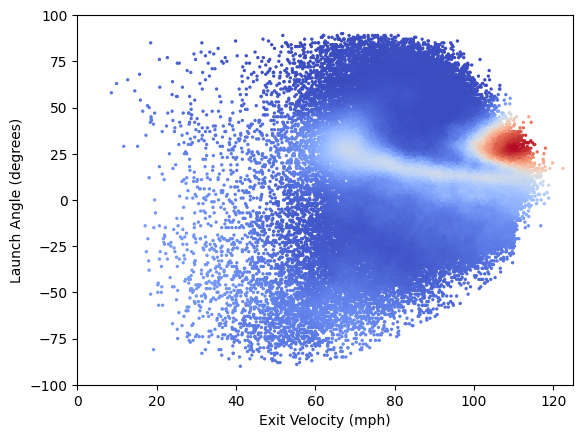

In [20]:
#Plot using the model
#Red are high wOBA values
#White are wOBA values in the middle
#Blue are low wOBA values
fig, ax = plt.subplots()
plt.scatter(x= X_test_raw[:,0], y= X_test_raw[:,1], c=wOBA_values.sum(axis =1), s=2, cmap="coolwarm")
ax.set_xlim(0,125)
ax.set_ylim(-100,100)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()

In [21]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(Y_test, preds_test)

0.6345106972413908

In [22]:
#Calibration Curve for Each Event
def plot_calibration_curve(y_test, target_class, preds):
    """ This function ingests a target variable
    and predicted probabilities to generate
    a calibration cure

    @param y_test: This list contains the multiclass target
      for our hit type model
    @param target_class: Integer corresponding to one target
       in the y_test list
    @param preds: Numpy array of predicted probabilities for
       each target class in y_test
    
    Returns:
    
       -fig: Matplotlib object calibration curve
    """
    #Convert multiclass target to binary based on target class
    binary_target = [1 if y==target_class else 0 for y in y_test]
    
    # Initialize visualizaton
    fig = plt.figure(1, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

    fraction_of_positives, mean_predicted_value = \
    calibration_curve(binary_target, preds [:,target_class], n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-")

    plt.close ()
    
    return fig

In [23]:
fig_list = []
for target in range(0,5):
    fig = plot_calibration_curve(y_test = Y_test,target_class = target,preds = preds_test)
    fig_list.append(fig)

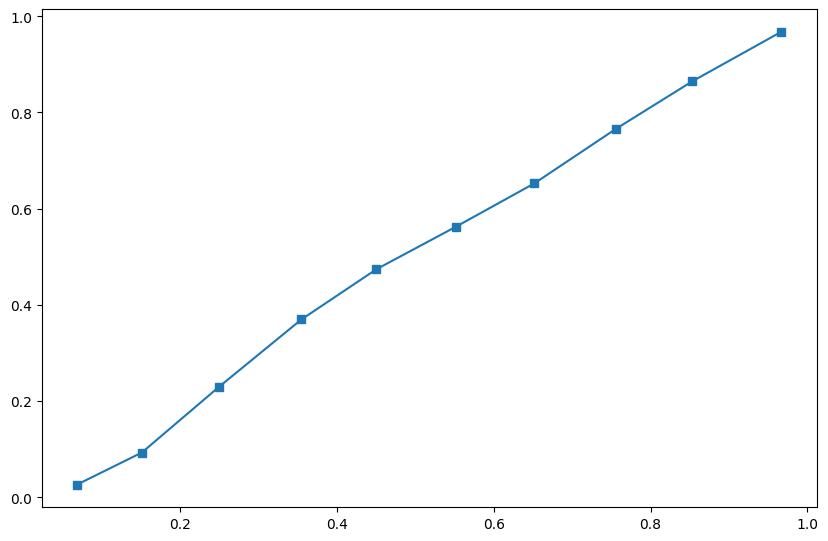

In [24]:
#Plot of calibration curve for an out
fig_list[0]


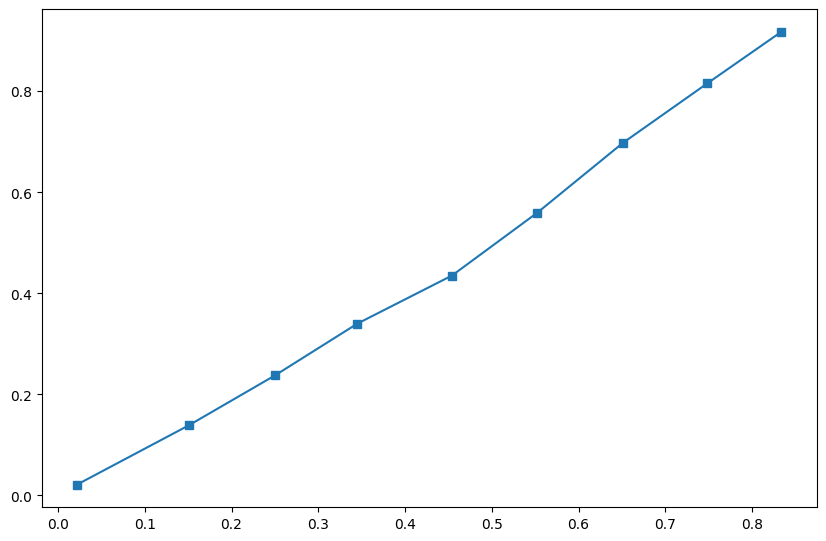

In [25]:
#Plot of calibration curve for a single
fig_list[1]

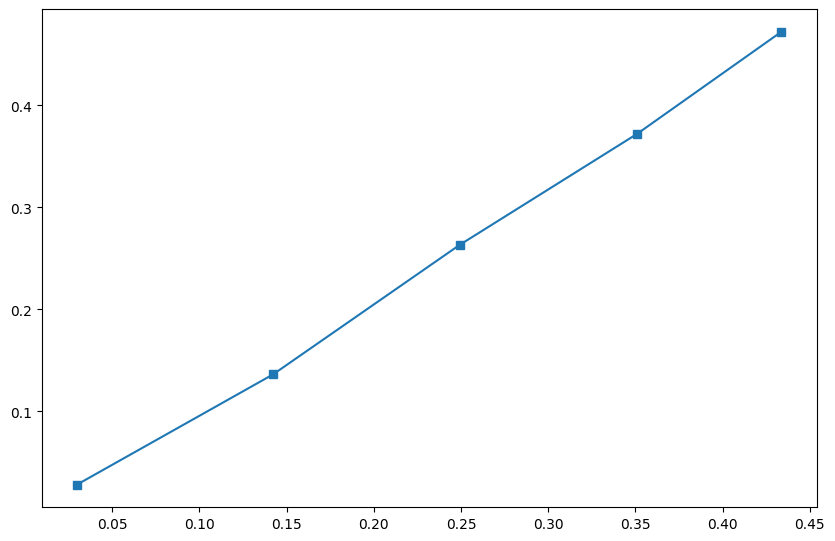

In [26]:
#Plot of calibration curve for a double
fig_list[2]

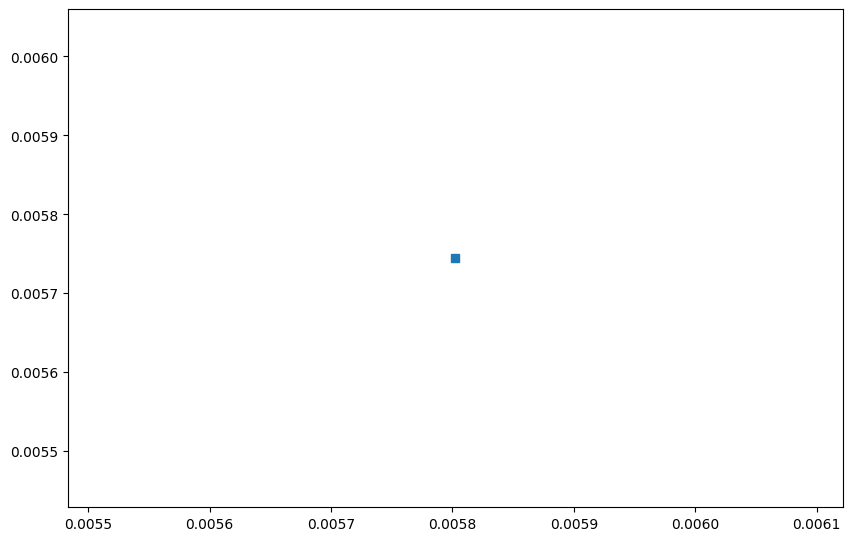

In [27]:
#Plot of calibration curve for a triple
fig_list[3]

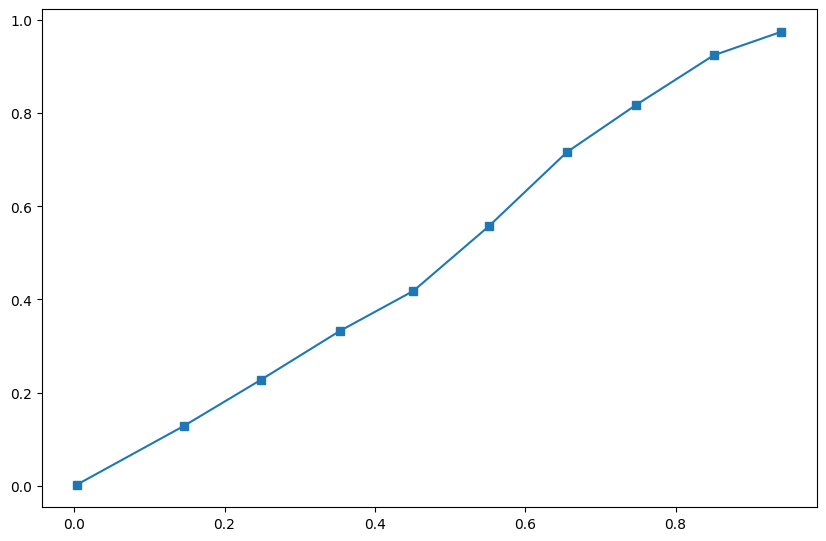

In [28]:
#Plot of calibration curve for a homerun
fig_list[4]

In [30]:
#Data Exploration
#Shows the probablility of each event for the given exit velocity and launch angle. A 1 indicates if the event occurred. 
test_df = pd.DataFrame(X_test_raw, columns=["exit_velo", "launch_angle"])
for target in range(0,5):
    test_df["target_" + str(target)] = [1 if y==target else 0 for y in Y_test]
    test_df["pred_" + str(target)] = preds_test[:, target]
test_df

,exit_velo,launch_angle,target_0,pred_0,target_1,pred_1,target_2,pred_2,target_3,pred_3,target_4,pred_4
0,107.3,-8.0,1,0.614286,0,0.347619,0,0.038095,0,0.000000,0,0.000000
1,102.5,-12.0,1,0.719048,0,0.271429,0,0.009524,0,0.000000,0,0.000000
2,102.3,32.0,1,0.390476,0,0.000000,0,0.057143,0,0.009524,0,0.542857
3,106.2,11.0,0,0.133333,0,0.609524,1,0.233333,0,0.023810,0,0.000000
4,81.6,13.0,0,0.323810,1,0.609524,0,0.066667,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
83036,104.9,-2.0,0,0.542857,1,0.414286,0,0.042857,0,0.000000,0,0.000000
83037,95.0,-12.0,1,0.785714,0,0.195238,0,0.019048,0,0.000000,0,0.000000
83038,91.1,13.0,0,0.080952,1,0.790476,0,0.114286,0,0.014286,0,0.000000
83039,90.8,-17.0,1,0.819048,0,0.161905,0,0.019048,0,0.000000,0,0.000000


In [32]:
#Shows the difference between the target value and the predicited value for each event in the data set

test_df["diff_0"] = test_df["target_0"] - test_df["pred_0"]
test_df.sort_values("diff_0")

test_df["diff_1"] = test_df["target_1"] - test_df["pred_1"]
test_df.sort_values("diff_1")

test_df["diff_2"] = test_df["target_2"] - test_df["pred_2"]
test_df.sort_values("diff_2")

test_df["diff_3"] = test_df["target_3"] - test_df["pred_3"]
test_df.sort_values("diff_3")

test_df["diff_4"] = test_df["target_4"] - test_df["pred_4"]
test_df.sort_values("diff_4")

,exit_velo,launch_angle,target_0,pred_0,target_1,pred_1,target_2,pred_2,target_3,pred_3,target_4,pred_4,diff_4,diff_0,diff_1,diff_2,diff_3
24675,108.1,29.0,0,0.028571,0,0.004762,1,0.014286,0,0.004762,0,0.947619,-0.947619,-0.028571,-0.004762,0.985714,-0.004762
16590,111.9,33.0,1,0.038095,0,0.004762,0,0.009524,0,0.000000,0,0.947619,-0.947619,0.961905,-0.004762,-0.009524,0.000000
51326,108.9,26.0,0,0.009524,0,0.009524,1,0.042857,0,0.000000,0,0.938095,-0.938095,-0.009524,-0.009524,0.957143,0.000000
56697,108.9,26.0,0,0.009524,0,0.009524,1,0.042857,0,0.000000,0,0.938095,-0.938095,-0.009524,-0.009524,0.957143,0.000000
78134,111.9,34.0,1,0.052381,0,0.004762,0,0.009524,0,0.004762,0,0.928571,-0.928571,0.947619,-0.004762,-0.009524,-0.004762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,87.9,37.0,0,0.990476,0,0.000000,0,0.009524,0,0.000000,1,0.000000,1.000000,-0.990476,0.000000,-0.009524,0.000000
41743,91.5,16.0,0,0.166667,0,0.676190,0,0.147619,0,0.009524,1,0.000000,1.000000,-0.166667,-0.676190,-0.147619,-0.009524
53541,85.4,33.0,0,0.961905,0,0.004762,0,0.033333,0,0.000000,1,0.000000,1.000000,-0.961905,-0.004762,-0.033333,0.000000
60957,92.3,23.0,0,0.833333,0,0.033333,0,0.123810,0,0.009524,1,0.000000,1.000000,-0.833333,-0.033333,-0.123810,-0.009524
